In [35]:
#parameters for selecting data: type in the start date, the latest available date in the data is the end date
param_start_date='11/08/2016'
#if param_period is set as after, then selecting the time period after the param_start_date
#if param_period is set as before, then selecting the time period before the param_start_date for equal number of tweets as after the date
#if param_period is empty then selecting all the data
param_period=''

In [36]:
#read tweets and stock market data
name_tweets = "results.json"

with open(name_tweets, "r") as file:
    tweets_dfxx = pd.read_json(file, orient='index')
print(tweets_dfxx.columns)

tweets_dfxx.sort_index(inplace=True)
tweets_dfxx = tweets_dfxx.reset_index(drop=True)

#keep only the tweet data and drop empty rows
tweets_dataframe=tweets_dfxx[tweets_dfxx["value change"].notnull()]

print("Number of tweets: ", len(tweets_dataframe))

if param_period=='':
    tweets_df=tweets_dataframe
else:

    #select the data sets based on the param_start_date
    tweets_dfa=tweets_dataframe.loc[tweets_dataframe["timestamp"] > datetime.strptime(param_start_date, '%m/%d/%Y')]
    print("Number of tweets after the start date: ", len(tweets_dfa))

    before=len(tweets_dataframe)-2*len(tweets_dfa)
    tweets_dfb=tweets_dataframe.loc[tweets_dataframe.index>before]
    tweets_dfb=tweets_dfb.loc[tweets_dfb["timestamp"] <= datetime.strptime(param_start_date, '%m/%d/%Y')]
    print("Number of tweets before the start date: ", len(tweets_dfb))

    if param_period=='after':
        tweets_df=tweets_dfa
    if param_period=='before':
        tweets_df=tweets_dfb 

Index(['predicted changes', 'text', 'timestamp', 'tweet', 'value change'], dtype='object')
Number of tweets:  2348


In [38]:
#modifying data
tweets_df['difference'] = np.where(tweets_df["value change"]==tweets_df["predicted changes"], 1, 0)
print("Difference=1 when predicted change is equal to the real change")
tweets_df.head()

Difference=1 when predicted change is equal to the real change


,predicted changes,text,timestamp,tweet,value change,difference
0,BIGNEG,tuesday will be a big day for our country to d...,2015-06-14 21:18:23,Tuesday will be a big day for our country to d...,MEDNEG,0
1,MEDPOS,https https i d vote twice for you if i could ...,2015-06-15 11:30:53,"""@FuturisticHub: @realDonaldTrump I'd vote twi...",MEDPOS,1
2,SMAPOS,https https trump time for a true leader to le...,2015-06-15 11:41:38,"""@fyrftr211: @realDonaldTrump #Trump2016. Time...",MEDPOS,0
3,BIGNEG,https politicians are not going to get us out ...,2015-06-15 11:43:49,"""@LooneyTunes002: Politicians are not going to...",MEDPOS,0
4,MEDPOS,live on periscope https,2015-06-15 14:55:16,LIVE on #Periscope https://t.co/H8lRtZBGEb,MEDPOS,1


In [39]:
tweets_dfx=tweets_df.loc[tweets_df["value change"]!=tweets_df["predicted changes"]]
print("Predicted change is identical to the real stock market change",len(tweets_df)-len(tweets_dfx))
print("Predicted change is not identical to the real stock market change",len(tweets_dfx))


tweets_df1x=tweets_dfx.loc[(tweets_dfx["value change"].values=='BIGPOS') | (tweets_dfx["value change"].values=='MEDPOS') |
                         (tweets_dfx["value change"].values=='SMAPOS')]
tweets_df1=tweets_df1x.loc[(tweets_df1x["predicted changes"].values=='BIGPOS') | (tweets_df1x["predicted changes"].values=='MEDPOS') |
                         (tweets_df1x["predicted changes"].values=='SMAPOS')]

tweets_df2x=tweets_dfx.loc[(tweets_dfx["value change"].values=='BIGNEG') | (tweets_dfx["value change"].values=='MEDNEG') |
                         (tweets_dfx["value change"].values=='SMANEG')]
tweets_df2=tweets_df2x.loc[(tweets_df2x["predicted changes"].values=='BIGNEG') | (tweets_df2x["predicted changes"].values=='MEDNEG') |
                         (tweets_df2x["predicted changes"].values=='SMANEG')]

print("Predicted change is not equal but the direction is the same with the real stock market change",len(tweets_df1)+len(tweets_df2))

print("The direction of predicted change is opposite to the stock market change",len(tweets_dfx)-(len(tweets_df1)+len(tweets_df2)))


Predicted change is identical to the real stock market change 1058
Predicted change is not identical to the real stock market change 1290
Predicted change is not equal but the direction is the same with the real stock market change 518
The direction of predicted change is opposite to the stock market change 772


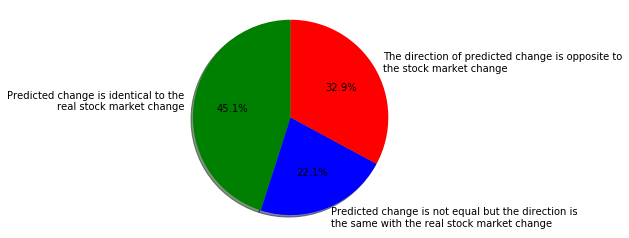

In [40]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
text1=textwrap.fill('Predicted change is identical to the real stock market change', width=40)
text2=textwrap.fill('Predicted change is not equal but the direction is the same with the real stock market change', width=50)
text3=textwrap.fill('The direction of predicted change is opposite to the stock market change', width=50)
labels = text1, text2, text3
colors  = ("green", "blue", "red")
sizes = [len(tweets_df)-len(tweets_dfx),len(tweets_df1)+len(tweets_df2),len(tweets_dfx)-(len(tweets_df1)+len(tweets_df2))]
#print(len(tweets_df),len(tweets_df1), len(tweets_df2))

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()